In [1]:
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [2]:
with open("./results.json", "r") as file:
    result_file = json.loads(file.read())

In [3]:
import re
result_df = pd.json_normalize(result_file)
result_df.rename(columns=lambda c: re.sub(r'^simulation_results.', '', c), inplace=True)
result_df.rename(columns=lambda c: re.sub(r'^simulation_config.', '', c), inplace=True)
result_df.sort_values(by='expected_throughput', ignore_index=True, inplace=True)
result_df

,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,controller_config.hidden_layer_size,...,verbose,repetitions,campaign_config.training_steps,campaign_config.testing_steps,campaign_config.live_testing_frequency,campaign_config.testing_repetitions,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward
0,100000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,64,256,...,False,1,10000000,10000,100000,3,19.666667,1.966667,0.000000,0.000000
1,8900000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,64,256,...,False,2,10000000,10000,100000,3,19.666667,1.966667,0.000000,0.000000
2,8900000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,64,256,...,False,2,10000000,10000,100000,3,19.666667,1.966667,0.000000,0.000000
3,8900000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,64,256,...,False,3,10000000,10000,100000,3,19.666667,1.966667,0.000000,0.000000
4,8900000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,64,256,...,False,3,10000000,10000,100000,3,19.666667,1.966667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,4700000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,64,256,...,False,1,10000000,10000,100000,3,19.666667,1.966667,0.553564,0.002396
2186,4500000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,64,256,...,False,2,10000000,10000,100000,3,19.666667,1.966667,0.000000,0.000000
2187,4500000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,64,256,...,False,2,10000000,10000,100000,3,19.666667,1.966667,0.000000,0.000000
2188,4500000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,64,256,...,False,3,10000000,10000,100000,3,19.666667,1.966667,0.000000,0.000000


In [4]:
result_df.reset_index(inplace=True, names='campaign_id')
result_df.head()

,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,verbose,repetitions,campaign_config.training_steps,campaign_config.testing_steps,campaign_config.live_testing_frequency,campaign_config.testing_repetitions,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward
0,0,100000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,64,...,False,1,10000000,10000,100000,3,19.666667,1.966667,0.0,0.0
1,1,8900000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,64,...,False,2,10000000,10000,100000,3,19.666667,1.966667,0.0,0.0
2,2,8900000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,64,...,False,2,10000000,10000,100000,3,19.666667,1.966667,0.0,0.0
3,3,8900000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,64,...,False,3,10000000,10000,100000,3,19.666667,1.966667,0.0,0.0
4,4,8900000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,64,...,False,3,10000000,10000,100000,3,19.666667,1.966667,0.0,0.0


In [5]:
import warnings
with warnings.catch_warnings():
    # Converting columns to numeric to improve visibility in graphs
    warnings.simplefilter("ignore")
    result_df['maximum_simulation_steps'] = pd.to_numeric(result_df['completed_training_steps'])
    result_df['mission_size'] = pd.to_numeric(result_df['mission_size'])
    result_df['num_agents'] = pd.to_numeric(result_df['num_agents'])
    result_df['score'] = result_df['avg_throughput'] / result_df['expected_throughput']

In [6]:
q_learning_testing = result_df[~result_df['training']]

# Analysing Q Learning training performance

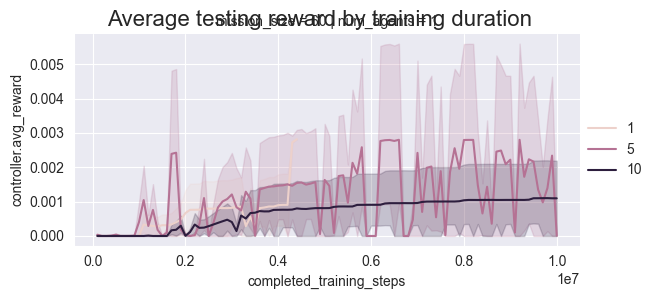

In [9]:
grid = sns.FacetGrid(q_learning_testing, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='completed_training_steps', y='controller.avg_reward', hue='controller_config.optimizing_rate')

grid.add_legend()

grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Average testing reward by training duration', fontsize=16)

plt.show()

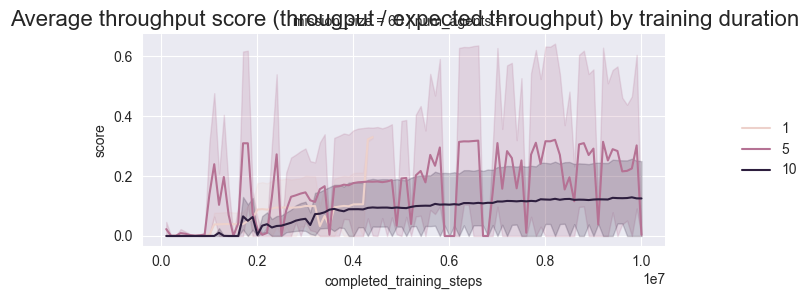

In [10]:
grid = sns.FacetGrid(q_learning_testing, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='completed_training_steps', y='score', hue='controller_config.optimizing_rate')

grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Average throughput score (througput / expected throughput) by training duration', fontsize=16)

grid.add_legend()

plt.show()